In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# load the data set
data = pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [9]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## Exploratory data analysis

<Axes: xlabel='age', ylabel='count'>

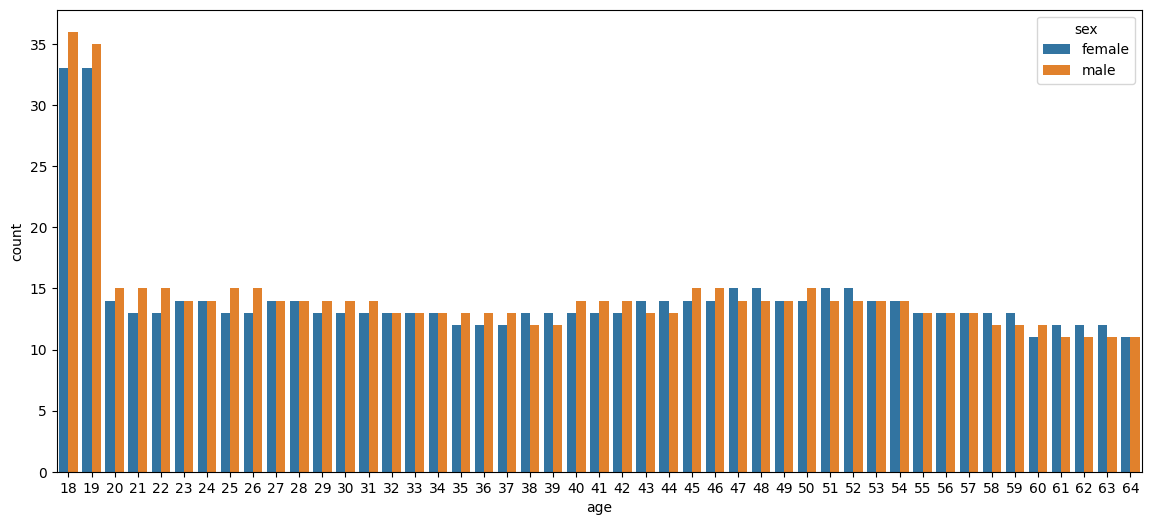

In [10]:
plt.figure(figsize = (14, 6))
sns.countplot(x = "age", hue = data['sex'], data = data)

<Axes: xlabel='sex', ylabel='count'>

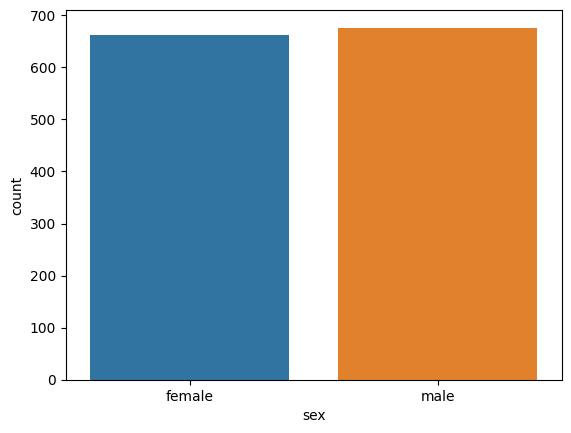

In [11]:
sns.countplot(x = "sex", data = data)

C:\Users\bgaut\AppData\Local\Temp\ipykernel_5788\3561404001.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


Text(0.5, 1.0, 'BMI distribution')

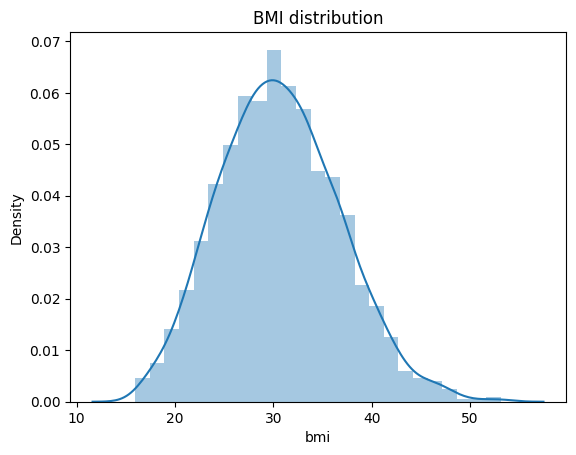

In [12]:
sns.distplot(data['bmi'])
plt.title('BMI distribution')

C:\Users\bgaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


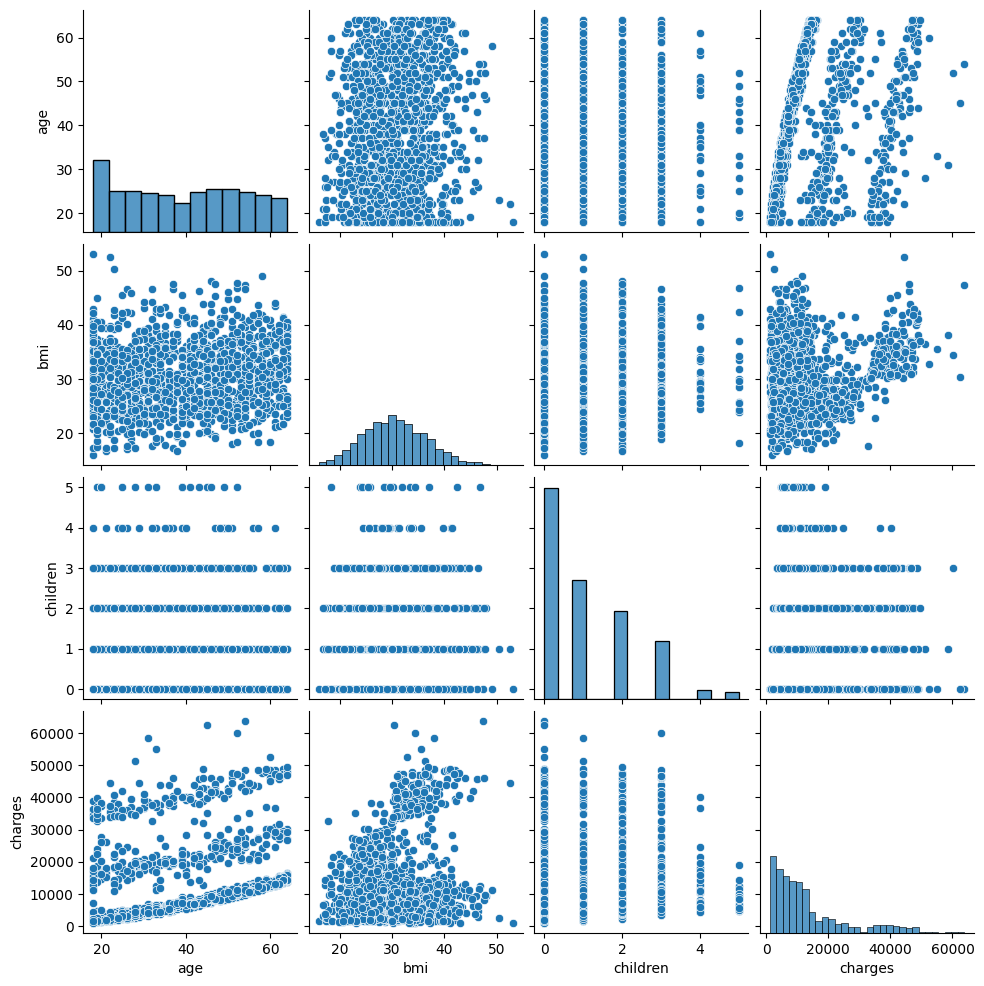

In [13]:
sns.pairplot(data)

<Axes: xlabel='children', ylabel='count'>

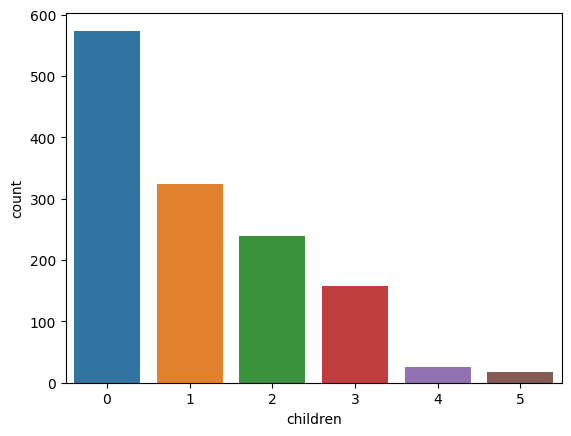

In [14]:
sns.countplot(x = 'children', data = data)

<Axes: xlabel='age', ylabel='count'>

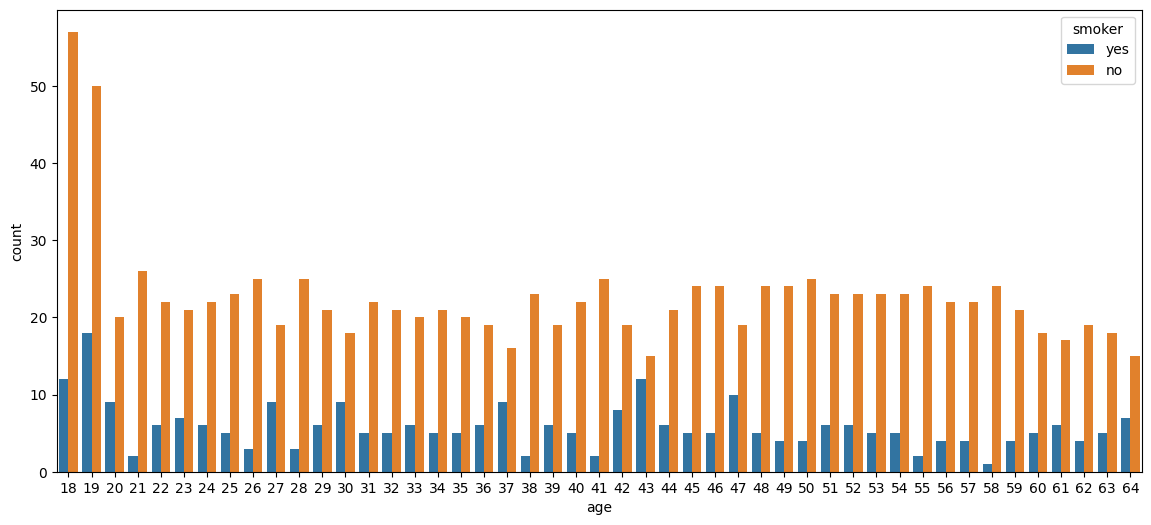

In [15]:
plt.figure(figsize = (14, 6))
sns.countplot(x = "age", hue = data['smoker'], data = data)

C:\Users\bgaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


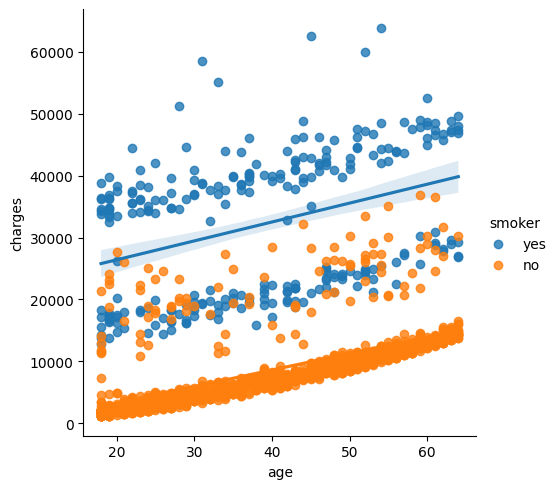

In [16]:
sns.lmplot(x = "age", y = "charges", data = data, hue = "smoker")

C:\Users\bgaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


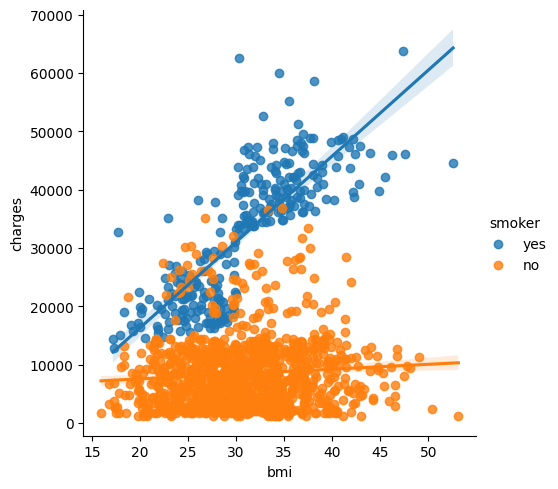

In [17]:
sns.lmplot(x = "bmi", y = "charges", data = data, hue = "smoker")

C:\Users\bgaut\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


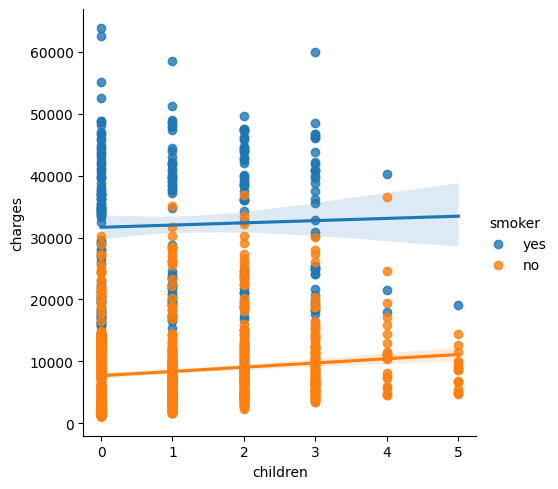

In [18]:
sns.lmplot(x = "children", y = "charges", data = data, hue = "smoker")

In [20]:
# chaneging the categorical labels into numrical using LabelEncoder
lb = LabelEncoder()
lb.fit(data.sex.drop_duplicates())
data.sex = lb.transform(data.sex)
lb.fit(data.smoker.drop_duplicates())
data.smoker = lb.transform(data.smoker)
lb.fit(data.region.drop_duplicates())
data.region = lb.transform(data.region)

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

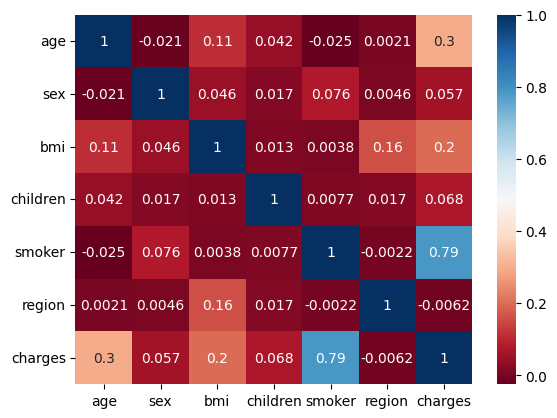

In [22]:
sns.heatmap(data.corr(), annot = True, cmap = "RdBu")

## Splitting the data

In [26]:
X = data.drop("charges", axis = 1)
Y = data["charges"]

In [28]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [29]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [31]:
print(X_train.shape, X_test.shape)

(1070, 6) (268, 6)


In [32]:
lin_reg = LinearRegression()

In [33]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [34]:
print(lin_reg.score(X_test, Y_test))

0.799874714544996
